<a href="https://colab.research.google.com/github/Akrammoh/linear-regression-from-scratch/blob/main/Univariat__Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">  Linear Regression </h1>





## Univariate Linear Regression with python and numpy






### Load the Data and Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/Linear Regression/dataset.txt'
data = pd.read_csv(DATA_PATH)

X_raw = data['X'].values
y_raw = data['y'].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data.head(5)

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [22]:
data.tail()

,X,y
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


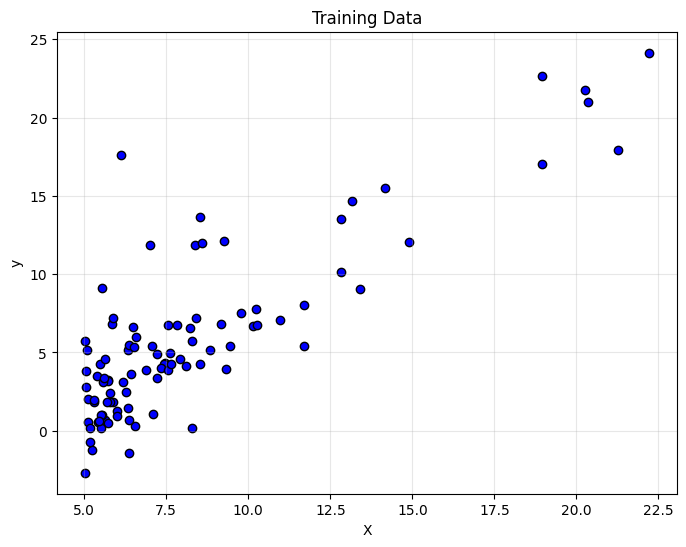

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_raw, y_raw, color='blue', edgecolor='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.grid(alpha=0.3)
plt.show()

In [24]:
m = len(X_raw)

X = np.c_[np.ones(m), X_raw]      # shape: (m, 2)
y = y_raw.reshape(m, 1)           # shape: (m, 1)


### Compute the Cost $J(\theta)$
---

The goal of linear regression is to minimize the cost function(mean square error)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [26]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * (X.T @ errors)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [27]:
theta_init = np.zeros((2, 1))
alpha = 0.01
iterations = 2000

theta, costs = gradient_descent(X, y, theta_init, alpha, iterations)

print(f"h(x) = {theta[0,0]:.2f} + {theta[1,0]:.2f}x")


h(x) = -3.79 + 1.18x


### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

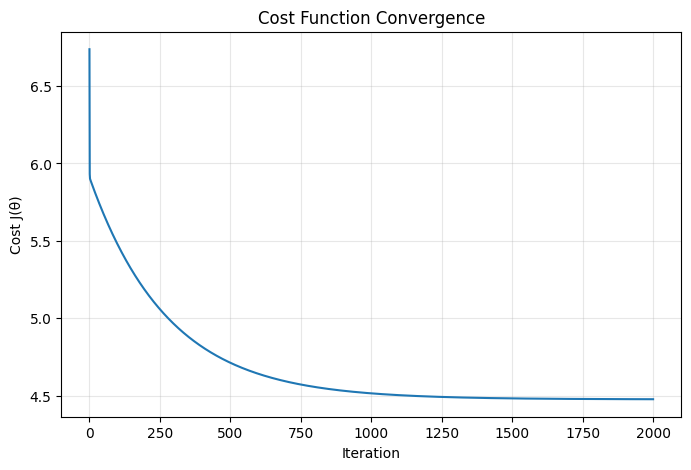

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function Convergence')
plt.grid(alpha=0.3)
plt.show()


### Training Data with Linear Regression Fit
---

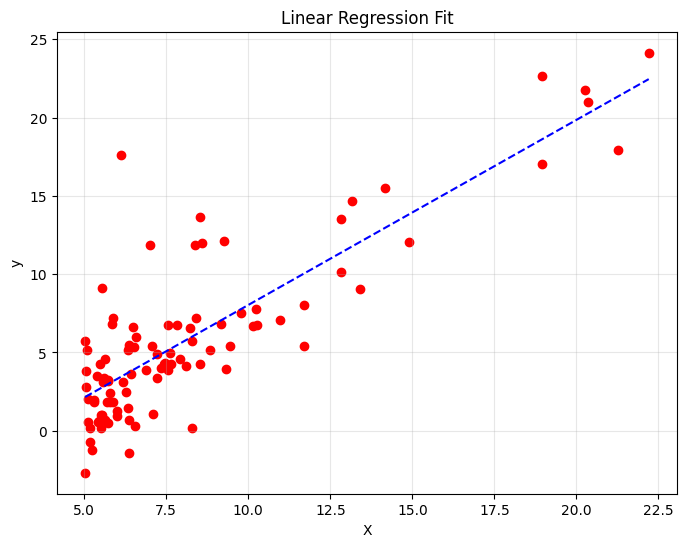

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_raw, y_raw, color='red')

x_line = np.linspace(X_raw.min(), X_raw.max(), 100)
y_line = theta[0] + theta[1] * x_line

plt.plot(x_line, y_line, 'b--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.grid(alpha=0.3)
plt.show()

### Predict using $\theta$ values


$h_\theta(x) = \theta^Tx$

In [30]:
def predict(X, theta):
    return X @ theta

In [31]:
test_example = np.array([[1, 7.5]])
print("Prediction:", predict(test_example, theta)[0, 0])

Prediction: 5.078527237957216


### Univariate Linear Regression with sklearn

In [32]:
from sklearn.metrics import r2_score

y_pred = predict(X, theta)
print("R2 Score (From Scratch):", r2_score(y, y_pred))

R2 Score (From Scratch): 0.70196125528343
